# Install Requirements

In [ ]:
! pip install transformers datasets rouge-score

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import glob
from datasets import load_dataset

# Read Corpus from Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cg_corpus_df = pd.read_csv("/content/drive/MyDrive/Common Ground Docs/Corpus/Corpus.csv")

In [5]:
conversations_df_list = []

In [6]:
start = 0
for i in range(len(cg_corpus_df['Eno.'])):
  if i>0:
    if cg_corpus_df['Eno.'][i-1] > cg_corpus_df['Eno.'][i]:
      df_new = cg_corpus_df.iloc[start:i].reset_index(drop=True)
      start = i
      conversations_df_list.append(df_new)
df_new = cg_corpus_df.iloc[start:].reset_index(drop=True)
conversations_df_list.append(df_new)

In [7]:
conversations_df_list[0]

,Unnamed: 0,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,0,"A: %um but although they solicit, they’re tryi...",1.1,"Although the company solicits, the company is ...",1,1,1,1
1,1,None,1.2,The company solicits,1,1,2,2
2,2,None,1.3,The company is trying to solicit more througho...,1,1,1,1
3,3,A: although they’ve had most interest in &Japa...,3.0,The company have had most interest in Japan,1,1,1,1
4,4,A: And I teach probably two classes and then d...,5.1,A teaches two classes,1,1,1,1
...,...,...,...,...,...,...,...,...
221,221,None,197.2,The new expression meant something when A said...,1,1,2,2
222,222,None,197.3,A said the new expression then,1,1,1,1
223,223,"A: %uh I, I need to know more information.",198.1,A needs to know more information,1,1,1,1
224,224,None,198.2,A knows more information,2,2,3,3


In [8]:
conversations_df_list[1]

,Unnamed: 0,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,226,B: because I drove across the country three ti...,3.1,B has been in the national park like five or s...,1,1,1,1
1,227,None,3.2,B has been in the national park like five or s...,1,3,1,3
2,228,None,3.3,B drove acress the country three times,1,1,1,1
3,229,None,3.4,B thinks that B has been in the national park ...,1,1,1,1
4,230,None,3.5,B has been in the national park three times,3,3,1,1
...,...,...,...,...,...,...,...,...
329,555,None,234.3,One really drinks milk this time,2,2,3,3
330,556,None,234.4,One better eat one's cottage cheese now,1,1,1,1
331,557,None,234.5,One eats one's cottage cheese now,2,2,3,3
332,558,B: {laugh} I Know.,235.0,B knows Everybody is probably saying now one b...,1,1,1,1


In [9]:
conversations_df_list[2]

,Unnamed: 0,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,560,B: So tell me a little bit about the day she w...,1.1,B asks A to tell B a little bit about the day ...,1,1,1,1
1,561,None,1.2,A tells B a little bit about the day Mae was born,0,3,0,0
2,562,None,1.3,Mae was born,1,1,2,2
3,563,None,1.4,B asks A when did A first saw Mae,1,1,1,1
4,564,None,1.5,A first saw Mae somewhere,1,1,2,2
...,...,...,...,...,...,...,...,...
405,965,None,343.2,A and B's mom and dad were at A and Robert's home,1,1,2,2
406,966,A: They came Saturday and stayed Saturday nigh...,344.1,A and B's mom and dad came Saturday,1,1,1,1
407,967,None,344.2,A and B's mom and dad stayed Saturday night,1,1,1,1
408,968,None,344.3,A and B's mom and dad left Monday,1,1,1,1


In [10]:
conversations_df_list[3]

,Unnamed: 0,Sentence,Eno.,Event,Bel(A),Bel(B),CG(A),CG(B)
0,970,B: %um I took them to %uh &Jill’s and they spe...,1.1,B took the kids to Jill's,1,1,1,1
1,971,None,1.2,The kids spent two days at Jill's,1,1,1,1
2,972,None,1.3,B guesses Jill couldn't take the kids,1,1,1,1
3,973,None,1.4,Jill couldn't take the kids,3,3,1,1
4,974,None,1.5,The kid's mom and dad came,1,1,1,1
...,...,...,...,...,...,...,...,...
320,1290,None,208.3,A's sons never treat one another like A and B'...,3,3,1,1
321,1291,B: True. I don’t think my kids will be that wa...,209.1,B doesn't think B's kids will be like A and B'...,1,1,1,1
322,1292,None,209.2,B's kids will be like A and B's mom and dad,3,3,1,1
323,1293,A: And he just looked at me. [channel noise],210.0,A and B's dad just looked at A,1,1,1,1


# Common Ground Classification From Belief

### Corpus Status on CG

In [11]:
cg_class_dict = {}

for conv_number in range(len(conversations_df_list)):
  for i in range(len(conversations_df_list[conv_number]['Event'])):
    record = conversations_df_list[conv_number].iloc[i]
    belA_belB = f"{record['Bel(A)']}{record['Bel(B)']}"
    cgA_cgB = f"{record['CG(A)']}{record['CG(B)']}"

    if cg_class_dict.get(cgA_cgB) is not None:
      if cg_class_dict.get(cgA_cgB).get(belA_belB) is not None: cg_class_dict[cgA_cgB][belA_belB] = cg_class_dict[cgA_cgB][belA_belB] + 1
      else: cg_class_dict[cgA_cgB][belA_belB] = 1
    else: cg_class_dict[cgA_cgB] = {belA_belB: 1}


# add SUM of CG
for cg in cg_class_dict:
  SUM = 0
  for bel in cg_class_dict[cg]: SUM += cg_class_dict[cg][bel]
  cg_class_dict[cg]["SUM"] = SUM

In [12]:
def cal_darsad(number_list, SUM):
  S = 0
  for record in number_list: S += record
  darsad = S*100/SUM
  return darsad

In [13]:
cal_darsad([], 89)

0.0

In [14]:
# 0
# 1: when an event has been just added to the CG
# 2: when an event already existed in the CG
# 3: when an event has been rejected from the CG
# 4: when it is impossible to determine the status

cg_class_dict

{'11': {'11': 922,
  '33': 63,
  '01': 7,
  '31': 9,
  '03': 1,
  '10': 9,
  '13': 3,
  'SUM': 1014},
 '22': {'11': 88, '33': 1, 'SUM': 89},
 '00': {'14': 4,
  '24': 6,
  '42': 3,
  '10': 5,
  '40': 2,
  '01': 6,
  '34': 3,
  '21': 1,
  '31': 8,
  '11': 2,
  '23': 3,
  '13': 2,
  '44': 30,
  '33': 5,
  '43': 2,
  '41': 3,
  '03': 3,
  '32': 4,
  '30': 2,
  'SUM': 94},
 '12': {'11': 1, 'SUM': 1},
 '33': {'22': 71,
  '21': 6,
  '12': 5,
  '32': 2,
  '44': 2,
  '02': 3,
  '34': 1,
  '23': 2,
  '14': 1,
  'SUM': 93},
 '13': {'13': 1, 'SUM': 1},
 '02': {'01': 1, 'SUM': 1},
 '23': {'12': 1, 'SUM': 1},
 '20': {'10': 1, 'SUM': 1}}

In [15]:
# CG      Bel                    Support
# 11  =>  11, 33                  94%
# 22  =>  11                      99%
# 33  =>  *2, 2*                  94%
# 00  =>  0*, *0, 4*, *4          83%

### Preprocess for delete 0 column

In [16]:
subset = {"Sentence": [], "Eno.": [],	"Event": [],	"Bel(A)": [],	"Bel(B)": [],	"CG(A)": [],	"CG(B)": []}

for i in range(len(conversations_df_list[3]['CG(A)'])):
  record = conversations_df_list[3].iloc[i]
  CG = str(record['CG(A)'])+str(record['CG(B)'])
  if CG not in ['00', '23', '20']:
     subset['Sentence'].append(record['Sentence'])
     subset['Eno.'].append(record['Eno.'])
     subset['Event'].append(record['Event'])
     subset['Bel(A)'].append(record['Bel(A)'])
     subset['Bel(B)'].append(record['Bel(B)'])
     subset['CG(A)'].append(record['CG(A)'])
     subset['CG(B)'].append(record['CG(B)'])

In [17]:
conversations_df_list[3] = pd.DataFrame.from_dict(subset)

### CG Classification

In [18]:
Cg_Memory = []
for i in range(len(conversations_df_list[3]['Event'])):
  event = conversations_df_list[3].iloc[i]
  target_event, sentence_number = event['Event'], int(event['Eno.'])

  # JA and IN
  if (event['Bel(A)']==1 and event['Bel(B)']==1):

    IN_flag = False
    for record in Cg_Memory:
      if record['sent_number'] != sentence_number: # ignore events of this sentence
        if target_event in record['Event']: IN_flag = True

    if IN_flag: Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 2, 'CG(B)': 2, 'sent_number': sentence_number})
    else: Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 1, 'CG(B)': 1, 'sent_number': sentence_number})

  elif (event['Bel(A)']==3 and event['Bel(B)']==3):
    Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 1, 'CG(B)': 1, 'sent_number': sentence_number})

  # RT
  elif event['Bel(A)']==2 or event['Bel(B)']==2:
    Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 3, 'CG(B)': 3, 'sent_number': sentence_number})

  # AM OR 0 Class
  else: Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 1, 'CG(B)': 1, 'sent_number': sentence_number})

In [19]:
Cg_Memory

[{'Event': "B took the kids to Jill's",
  'Bel(A)': 1,
  'Bel(B)': 1,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 1},
 {'Event': "The kids spent two days at Jill's",
  'Bel(A)': 1,
  'Bel(B)': 1,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 1},
 {'Event': "B guesses Jill couldn't take the kids",
  'Bel(A)': 1,
  'Bel(B)': 1,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 1},
 {'Event': "Jill couldn't take the kids",
  'Bel(A)': 3,
  'Bel(B)': 3,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 1},
 {'Event': "The kid's mom and dad came",
  'Bel(A)': 1,
  'Bel(B)': 1,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 1},
 {'Event': 'A asks B if B took the kids to Texas',
  'Bel(A)': 1,
  'Bel(B)': 1,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 2},
 {'Event': 'B took the kids to Texas',
  'Bel(A)': 3,
  'Bel(B)': 1,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 2},
 {'Event': 'B says yeah.  ',
  'Bel(A)': 1,
  'Bel(B)': 0,
  'CG(A)': 1,
  'CG(B)': 1,
  'sent_number': 3},
 {'Event': "The kids' mom 

In [20]:
len(Cg_Memory)

309

In [21]:
predictions_list = []

for record in Cg_Memory:
  prediction = f"{record['CG(A)']}{record['CG(B)']}"
  predictions_list.append(prediction)

labels_list = []

for i in range(len(conversations_df_list[3]['Event'])):
  event = conversations_df_list[3].iloc[i]
  label = f"{event['CG(A)']}{event['CG(B)']}"
  labels_list.append(label)

from sklearn.metrics import classification_report

report = classification_report(labels_list, predictions_list, zero_division=0, digits=4)
print(report)

              precision    recall  f1-score   support

          11     0.8974    1.0000    0.9459       245
          22     1.0000    0.0357    0.0690        28
          33     1.0000    0.9722    0.9859        36

    accuracy                         0.9094       309
   macro avg     0.9658    0.6693    0.6669       309
weighted avg     0.9187    0.9094    0.8711       309



In [22]:
(0.91+7+91)/3

32.97

### IN CG Processing

In [ ]:
! pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

In [25]:
from sentence_transformers import SentenceTransformer, util
import torch

def calculate_sbert_score(sentences1, sentences2):
    # Compute embedding for both lists
    embeddings1 = sbert_model.encode(sentences1, convert_to_tensor=True)
    embeddings2 = sbert_model.encode(sentences2, convert_to_tensor=True)

    # ompute cosine-similarities
    cosine_scores = util.cos_sim(embeddings1, embeddings2)
    output = torch.tensor([cosine_scores])
    return round(output.item(), 4)

In [26]:
from rouge_score import rouge_scorer

def calculate_rouge_score(reference, candidate):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
  scores = scorer.score(reference, candidate)
  return scores

In [27]:
import difflib

def is_match_difflib(target_text, memory):
  close_matches = difflib.get_close_matches(target_text, [memory])
  is_match = False
  if close_matches: is_match = True
  return is_match

def get_matching_memory(target_event, memory):
  matcher = difflib.SequenceMatcher(None, memory, target_event)
  matches = matcher.get_matching_blocks()
  matched_text = ""
  for match in matches:
      start = match.a
      end = match.a + match.size
      matched_text += memory[start:end]
  return matched_text

def cal_similarity_ratio(target_text, memory):
  similarity = difflib.SequenceMatcher(None, target_text, memory).ratio()
  return similarity

In [28]:
import difflib

def get_matching_words(target_text, memory_text):
    target_words = target_text.split()
    memory_words = memory_text.split()
    matcher = difflib.SequenceMatcher(None, memory_words, target_words)
    matches = matcher.get_matching_blocks()
    matched_words = []
    for match in matches:
        start = match.a
        end = match.a + match.size
        matched_words.extend(memory_words[start:end])
    matched_text = ' '.join(matched_words)
    return matched_text

In [46]:
Cg_Memory, similarity_list, False_Positive = [], [], []
Find_IN_CG = {'event':[], 'match_memory':[], 'matched_text':[], 'similarity':[], 'CG(A)':[], 'CG(B)':[]}
find_in, threshold, all_memory_events = 0, 1, ''

for i in range(len(conversations_df_list[3]['Event'])):
  event = conversations_df_list[3].iloc[i]
  target_event, sentence_number = event['Event'], int(event['Eno.'])

  # JA and IN
  if (event['Bel(A)']==1 and event['Bel(B)']==1):
    IN_flag, max_similarity_for_this_event = False, 0
    for record in Cg_Memory:
      if record['sent_number'] != sentence_number: # ignore events of this sentence
        is_match = is_match_difflib(target_event, record['Event'])
        if is_match:
          matched_text = get_matching_words(target_event, record['Event'])
          # similarity = cal_similarity_ratio(target_event, matched_text)
          similarity = calculate_sbert_score(target_event, record['Event'])
          if similarity > threshold and (record['CG(A)']!=3 and record['CG(B)']!=3): IN_flag = True
          if similarity > max_similarity_for_this_event: max_similarity_for_this_event = similarity

          if similarity>threshold:
            Find_IN_CG['event'].append(target_event)
            Find_IN_CG['match_memory'].append(record['Event'])
            Find_IN_CG['matched_text'].append(matched_text)
            Find_IN_CG['similarity'].append(similarity)
            Find_IN_CG['CG(A)'].append(event['CG(A)'])
            Find_IN_CG['CG(B)'].append(event['CG(B)'])

    if event['CG(A)']==2 and event['CG(B)']==2 and max_similarity_for_this_event!=0:
      similarity_list.append(max_similarity_for_this_event)

    if event['CG(A)']!=2 and event['CG(B)']!=2:
      if IN_flag==True:
        False_Positive.append(max_similarity_for_this_event)
        if similarity>0.85:
          print(f"{target_event}\n{matched_text}\n{record['Event']}\n{similarity}\n{event['CG(A)']}{event['CG(B)']}\n\n\n")

    if IN_flag: Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 2, 'CG(B)': 2, 'sent_number': sentence_number})
    else: Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 1, 'CG(B)': 1, 'sent_number': sentence_number})

  elif (event['Bel(A)']==3 and event['Bel(B)']==3):
    Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 1, 'CG(B)': 1, 'sent_number': sentence_number})

  # RT
  elif event['Bel(A)']==2 or event['Bel(B)']==2:
    Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 3, 'CG(B)': 3, 'sent_number': sentence_number})

  # AM OR 0 Class
  else: Cg_Memory.append({'Event': target_event, 'Bel(A)': event['Bel(A)'], 'Bel(B)': event['Bel(B)'], 'CG(A)': 1, 'CG(B)': 1, 'sent_number': sentence_number})

In [47]:
predictions_list = []

for record in Cg_Memory:
  prediction = f"{record['CG(A)']}{record['CG(B)']}"
  predictions_list.append(prediction)

labels_list = []
for i in range(len(conversations_df_list[3]['Event'])):
  event = conversations_df_list[3].iloc[i]
  label = f"{event['CG(A)']}{event['CG(B)']}"
  labels_list.append(label)

  # Test
  if label != predictions_list[i]:
    if label=="22":
      print(conversations_df_list[3]['Event'][i], "\n")
      print(predictions_list[i])

from sklearn.metrics import classification_report

report = classification_report(labels_list, predictions_list, zero_division=0, digits=4)
print(report)

The kids are getting back 

11
B was gone 

11
Something else is going on 

11
B sleeps 

11
Kara would stay in a place where Jill is not wanted 

11
Kara is not wanted in the old man's place 

11
Kara would stay in a state where Kara hardly knows anybody 

11
Kara hardly knows anybody 

11
Kara said that Patty was going to but Kara a car 

11
Patty was going to but Kara a car 

11
Kara doesn't stand up on Kara's own two feet 

11
Kara said something to A 

11
Drew's mom is probably saying someting to Kara 

11
A called A and B's mom and dad sergeant and lieutenant 

11
A and B's mom and dad kept lecturing A 

11
Kara was somewhere 

11
Kara and A had two conversations 

11
A said soemthing to Kara 

11
Nobody else contacts A and B's mom and dad 

11
A and B's mom and dad have done something 

11
Shit happens when one is a kid 

11
A doesn't want to go to Des Moines 

11
A didn't want A to go to Des Moines 

11
A and B's mom and dad call this behavior somethign else than punishing A 



In [ ]:
Find_IN_CG = pd.DataFrame.from_dict(Find_IN_CG)
Find_IN_CG.to_csv("Find_IN_CG.csv")

In [ ]:
Cg_Memory

In [ ]:
print(similarity_list[:10])
print(False_Positive[:10])

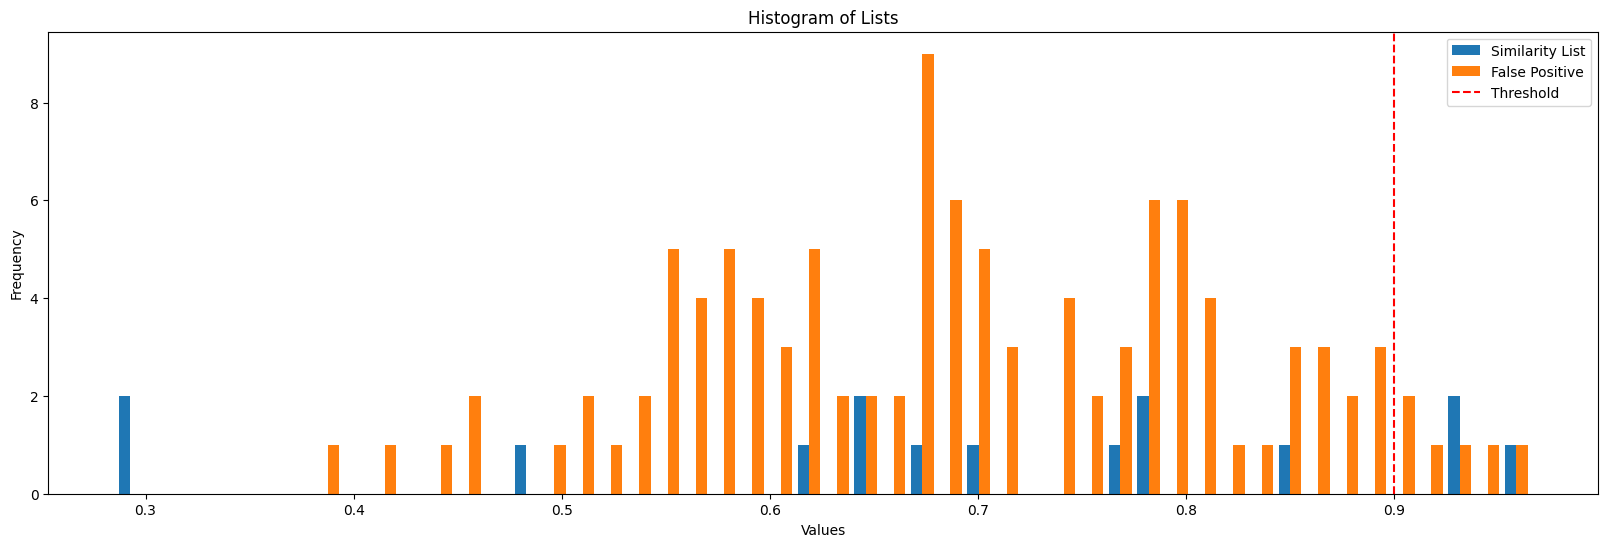

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(list1, list2, threshold):
    fig = plt.figure(figsize=(20, 6))
    plt.hist([list1, list2], bins=50, label=['Similarity List', 'False Positive'])
    plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
    plt.title('Histogram of Lists')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_histogram(similarity_list, False_Positive, 0.9)

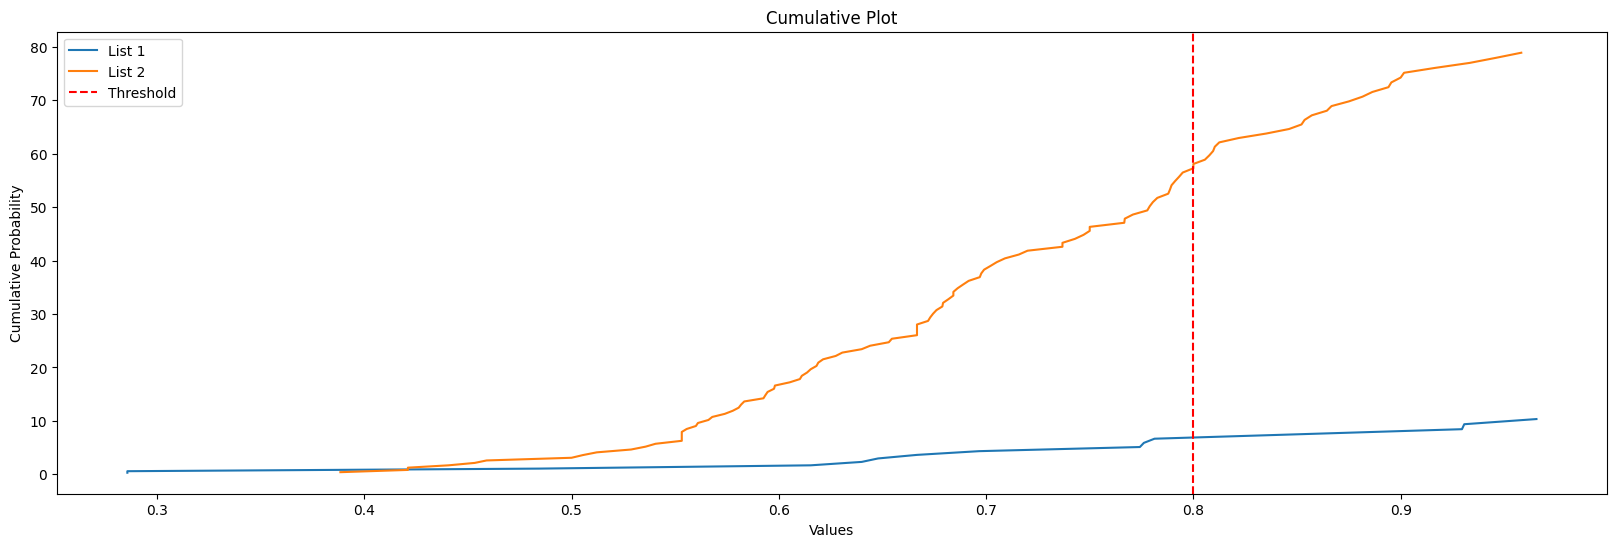

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cumulative(list1, list2, threshold):
    fig = plt.figure(figsize=(20, 6))
    sorted_list1 = np.sort(list1)
    sorted_list2 = np.sort(list2)
    # cumulative_list1 = np.cumsum(sorted_list1) / np.sum(sorted_list1)
    # cumulative_list2 = np.cumsum(sorted_list2) / np.sum(sorted_list2)
    cumulative_list1 = np.cumsum(sorted_list1)
    cumulative_list2 = np.cumsum(sorted_list2)
    plt.plot(sorted_list1, cumulative_list1, label='List 1')
    plt.plot(sorted_list2, cumulative_list2, label='List 2')
    plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
    plt.title('Cumulative Plot')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

plot_cumulative(similarity_list, False_Positive, 0.8)

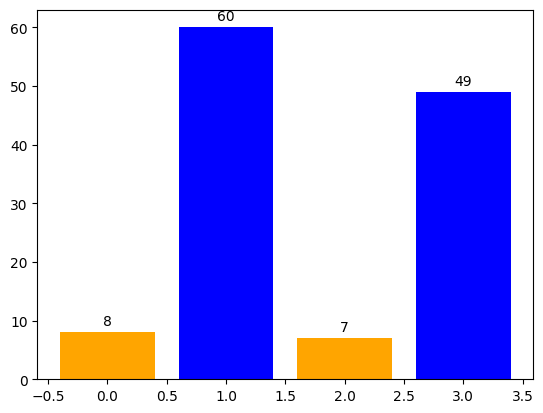

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cumulative_bar(list1, list2, threshold):
    count_list1_before = np.sum(list1 < threshold)
    count_list1_after = len(list1) - count_list1_before
    count_list2_before = np.sum(list2 < threshold)
    count_list2_after = len(list2) - count_list2_before

    x = np.arange(4)
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, [count_list1_before, count_list2_before, count_list1_after, count_list2_after], color=['orange', 'blue', 'orange', 'blue'])

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    plt.show()

plot_cumulative_bar(np.array(similarity_list), np.array(False_Positive), 0.7)

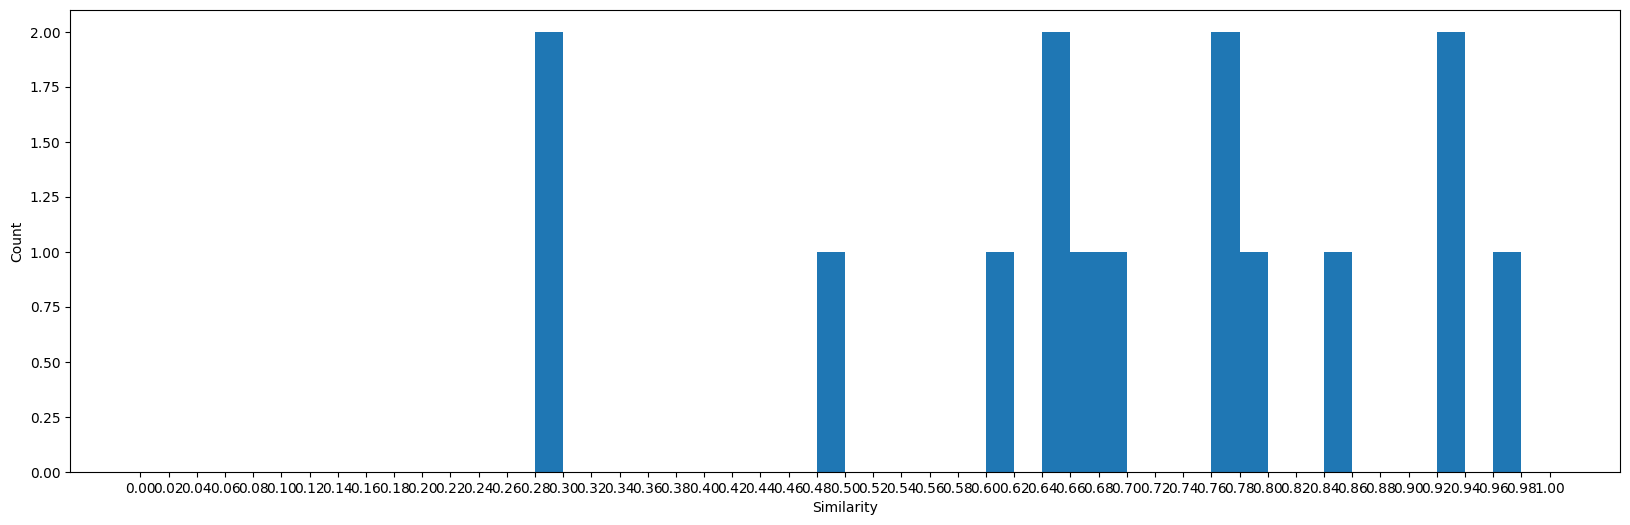

In [ ]:
import matplotlib.pyplot as plt

data = similarity_list
bin_width = 0.02
bins = [i * bin_width for i in range(int(1 / bin_width) + 1)]
fig = plt.figure(figsize=(20, 6))
plt.hist(data, bins=bins)
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.xticks(bins)
plt.show()

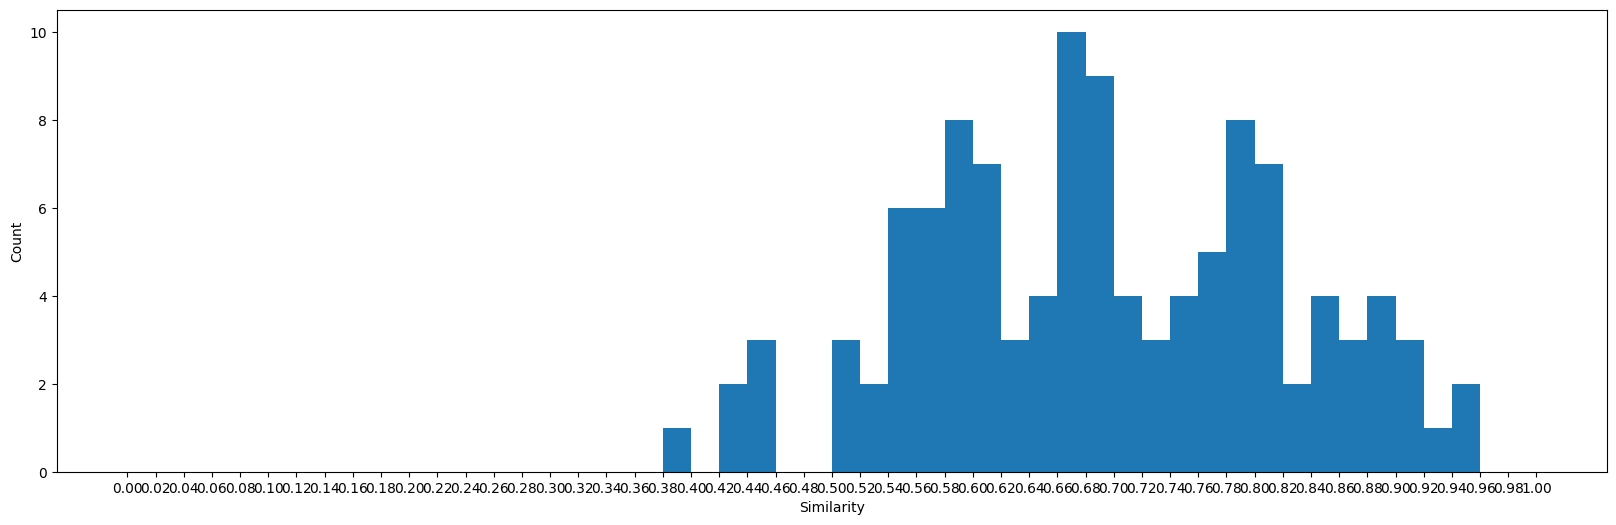

In [ ]:
import matplotlib.pyplot as plt

data = False_Positive
bin_width = 0.02
bins = [i * bin_width for i in range(int(1 / bin_width) + 1)]
fig = plt.figure(figsize=(20, 6))
plt.hist(data, bins=bins)
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.xticks(bins)
plt.show()

In [ ]:
def cal_darsad(list1):
  SUM = 0
  for record in list1: SUM+=record
  AVG = SUM/len(list1)
  return AVG

In [ ]:
print(cal_darsad([64, 20, 91]))
print(cal_darsad([49, 54, 97]))
print(cal_darsad([90, 12, 85]))

58.333333333333336
66.66666666666667
62.333333333333336


### Difflib

In [ ]:

              precision    recall  f1-score   support

          11       0.90      0.49      0.64       245
          22       0.12      0.54      0.20        28
          33       0.85      0.97      0.91        36

    accuracy                           0.55       325
   macro avg       0.36      0.42      0.35       325
weighted avg       0.79      0.55      0.61       325

# threshold=0.2
              precision    recall  f1-score   support

          11       0.90      0.49      0.64       245
          22       0.12      0.54      0.20        28
          33       0.85      0.97      0.91        36

    accuracy                           0.55       325
   macro avg       0.36      0.42      0.35       325
weighted avg       0.79      0.55      0.61       325

# threshold=0.4
              precision    recall  f1-score   support

          11       0.88      0.50      0.64       245
          22       0.11      0.46      0.17        28
          33       0.85      0.97      0.91        36

    accuracy                           0.54       325
   macro avg       0.36      0.41      0.35       325
weighted avg       0.78      0.54      0.61       325

# threshold=0.6
              precision    recall  f1-score   support

          11       0.90      0.61      0.73       245
          22       0.13      0.43      0.20        28
          33       0.85      0.97      0.91        36

    accuracy                           0.63       325
   macro avg       0.36      0.42      0.37       325
weighted avg       0.80      0.63      0.68       325

# threshold=0.8
              precision    recall  f1-score   support

          11       0.89      0.84      0.87       245
          22       0.15      0.14      0.15        28
          33       0.85      0.97      0.91        36

    accuracy                           0.78       325
   macro avg       0.36      0.41      0.38       325
weighted avg       0.79      0.78      0.78       325

# threshold=0.9
              precision    recall  f1-score   support

          11       0.89      0.92      0.91       245
          22       0.38      0.11      0.17        28
          33       0.85      0.97      0.91        36

    accuracy                           0.83       325
   macro avg       0.40      0.42      0.39       325
weighted avg       0.81      0.83      0.81       325

# threshold=0.92
              precision    recall  f1-score   support

          11       0.89      0.93      0.91       245
          22       0.50      0.11      0.18        28
          33       0.85      0.97      0.91        36

    accuracy                           0.84       325
   macro avg       0.42      0.42      0.39       325
weighted avg       0.82      0.84      0.82       325


# threshold=0.95
              precision    recall  f1-score   support

          11       0.89      0.93      0.91       245
          22       0.50      0.04      0.07        28
          33       0.85      0.97      0.91        36

    accuracy                           0.84       325
   macro avg       0.42      0.41      0.38       325
weighted avg       0.82      0.84      0.81       325


# threshold=1
              precision    recall  f1-score   support

          11       0.88      0.94      0.91       245
          22       0.00      0.00      0.00        28
          33       0.85      0.97      0.91        36

    accuracy                           0.84       325
   macro avg       0.34      0.40      0.36       325
weighted avg       0.77      0.84      0.80       325


### sbert

In [ ]:
# threshold=0

              precision    recall  f1-score   support

          00       0.29      0.50      0.37        14
          11       0.90      0.49      0.64       245
          20       0.00      0.00      0.00         1
          22       0.12      0.54      0.20        28
          23       0.00      0.00      0.00         1
          33       0.85      0.97      0.91        36

    accuracy                           0.55       325
   macro avg       0.36      0.42      0.35       325
weighted avg       0.79      0.55      0.61       325


# threshold=0.2

# threshold=0.4

# threshold=0.6

# threshold=0.8

# threshold=0.9

# threshold=0.92

# threshold=0.95

# threshold=1


### rouge1

In [ ]:
# threshold=0

# threshold=0.2

# threshold=0.4

# threshold=0.6

# threshold=0.8

# threshold=0.9

# threshold=0.92

# threshold=0.95

# threshold=1

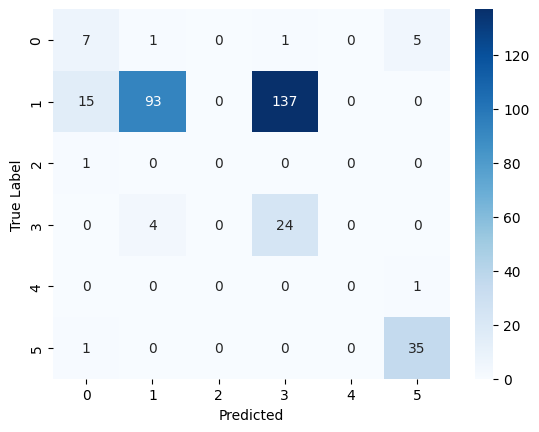

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(labels_list, predictions_list)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

In [ ]:
is_match_difflib("B sleeps", "A asks B when B sleeps then")

False

In [ ]:
cal_similarity_ratio("B sleeps", "A asks B when B sleeps then")

0.45714285714285713

In [ ]:
get_matching_memory("B sleeps", "A asks B when B sleeps then")

'B sleeps'

### What is Difflib?

The main purpose of difflib is to identify the similarities and differences between two sequences, whether they are strings, lists, or any other iterable objects. It can be useful for tasks like finding the closest matching string, computing the **edit distance** between two strings, or generating differences between sequences.

In [ ]:
import difflib

memory = "I love spending time in nature. It brings me a sense of peace and tranquility that I cannot find anywhere else."
target_text = "Spending time in nature is a source of tranquility and inner peace for me."
close_matches = difflib.get_close_matches(target_text, [memory])

if close_matches:
    inferred_text = close_matches[0]
    print("Target Text Inferred:", inferred_text)
else:
    print("Cannot infer Target Text.")


Target Text Inferred: I love spending time in nature. It brings me a sense of peace and tranquility that I cannot find anywhere else.


In [ ]:
import difflib

text1 = "Hello"
text2 = "Halo"

similarity_ratio = difflib.SequenceMatcher(None, text1, text2).ratio()

print("Similarity Ratio:", similarity_ratio)

Similarity Ratio: 0.6666666666666666


In [ ]:
import difflib

text1 = "Hello, how are you today?"
text2 = "Hello, how are you doing?"

matcher = difflib.SequenceMatcher(None, text1, text2)
matches = matcher.get_matching_blocks()

for match in matches:
    start = match.a
    end = match.a + match.size
    matched_text = text1[start:end]
    print("Matched Text:", matched_text)

[Match(a=0, b=0, size=19), Match(a=20, b=20, size=1), Match(a=24, b=24, size=1), Match(a=25, b=25, size=0)]
Matched Text: Hello, how are you 
Matched Text: o
Matched Text: ?
Matched Text: 


In [ ]:
get_matching_memory("hello i am mohammad", "hello mohammad")

'hello mohammad'